In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from matplotlib import gridspec

In [23]:
#articles = pd.read_csv("data/articles.csv")
#customers = pd.read_csv("data/customers.csv")
#transactions = pd.read_csv("data/transactions_train.csv")

#transactions.to_parquet('data/transactions.parquet')
#articles.to_parquet('data/articles.parquet')
#customers.to_parquet('data/customers.parquet')

articles = pd.read_parquet('data/articles.parquet')
customers = pd.read_parquet('data/customers.parquet')
transactions = pd.read_parquet('data/transactions.parquet')

In [130]:
pd.to_datetime(transactions['t_dat'])

0          2018-09-20
1          2018-09-20
2          2018-09-20
3          2018-09-20
4          2018-09-20
              ...    
31788319   2020-09-22
31788320   2020-09-22
31788321   2020-09-22
31788322   2020-09-22
31788323   2020-09-22
Name: t_dat, Length: 31788324, dtype: datetime64[ns]

In [11]:
print(articles.keys())
print(customers.keys())
print(transactions.keys())

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')
Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')
Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')


# 特徴量作成

## customer

客の合計購入品目数

In [5]:
customers = customers.merge(transactions.groupby('customer_id')['t_dat'].agg('count').reset_index().rename(columns={'t_dat': 'num_purchases_items'}), on='customer_id', how='left')
customers['num_purchases_items'] = customers['num_purchases_items'].fillna(0).astype(int)

客の買い物をした日数

In [6]:
customers = customers.merge(transactions.groupby(['customer_id', 't_dat']).agg('count').reset_index().groupby('customer_id').agg('count').reset_index().rename(columns={'t_dat': 'num_visits'}), on='customer_id', how='left')
customers['num_visits'] = customers['num_visits'].fillna(0).astype(int)

## article

商品ごとの総売上数

In [24]:
articles = articles.merge(transactions.groupby('article_id')['t_dat'].agg('count').reset_index().rename(columns={'t_dat': 'num_sales'}), on='article_id', how='left')
articles['num_sales'] = articles['num_sales'].fillna(0).astype(int)

商品の平均価格

In [25]:
articles = articles.merge(transactions.groupby('article_id')['price'].agg('mean').reset_index().rename(columns={'price': 'ave_price'}), on='article_id', how='left')
articles['ave_price'] = articles['ave_price']

商品ごとの総売上高

In [26]:
articles = articles.merge(transactions.groupby('article_id')['price'].agg('sum').reset_index().rename(columns={'price': 'total_sales'}), on='article_id', how='left')
articles['total_sales'] = articles['total_sales']

In [27]:
articles.head()

article_id  product_code          prod_name  product_type_no  \
0  0108775015        108775          Strap top              253   
1  0108775044        108775          Strap top              253   
2  0108775051        108775      Strap top (1)              253   
3  0110065001        110065  OP T-shirt (Idro)              306   
4  0110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid                 10             White  ...   
2                    Stripe                 11         Off White  ...   
3                     Solid                  9             Black  ...   
4                     Solid                 10             White  ...   

   index_group_no index_group_name  section_no            section_name  \
0               1       Ladieswear          16  Womens Everyday Basics   
1               1       Ladieswear          16  Womens Everyday Basics   
2               1       Ladieswear          16  Womens Everyday Basics   
3               1       Ladieswear          61         Womens Lingerie   
4               1       Ladieswear          61         Womens Lingerie   

   garment_group_no garment_group_name  \
0              1002       Jersey Basic   
1              1002       Jersey Basic   
2              1002       Jersey Basic   
3              1017  Under-, Nightwear   
4              1017  Under-, Nightwear   

                                         detail_desc num_sales  ave_price  \
0            Jersey top with narrow shoulder straps.     10841   0.008142   
1            Jersey top with narrow shoulder straps.      7250   0.008114   
2            Jersey top with narrow shoulder straps.       215   0.004980   
3  Microfibre T-shirt bra with underwired, moulde...      1044   0.020219   
4  Microfibre T-shirt bra with underwired, moulde...       539   0.018205   

  total_sales  
0   88.262881  
1   58.826169  
2    1.070644  
3   21.108746  
4    9.812746  

[5 rows x 28 columns]

In [148]:
articles.keys()

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc', 'num_sales'],
      dtype='object')

# 客の購入品目数の分布

購入商品が少ないcold startの客が多い。

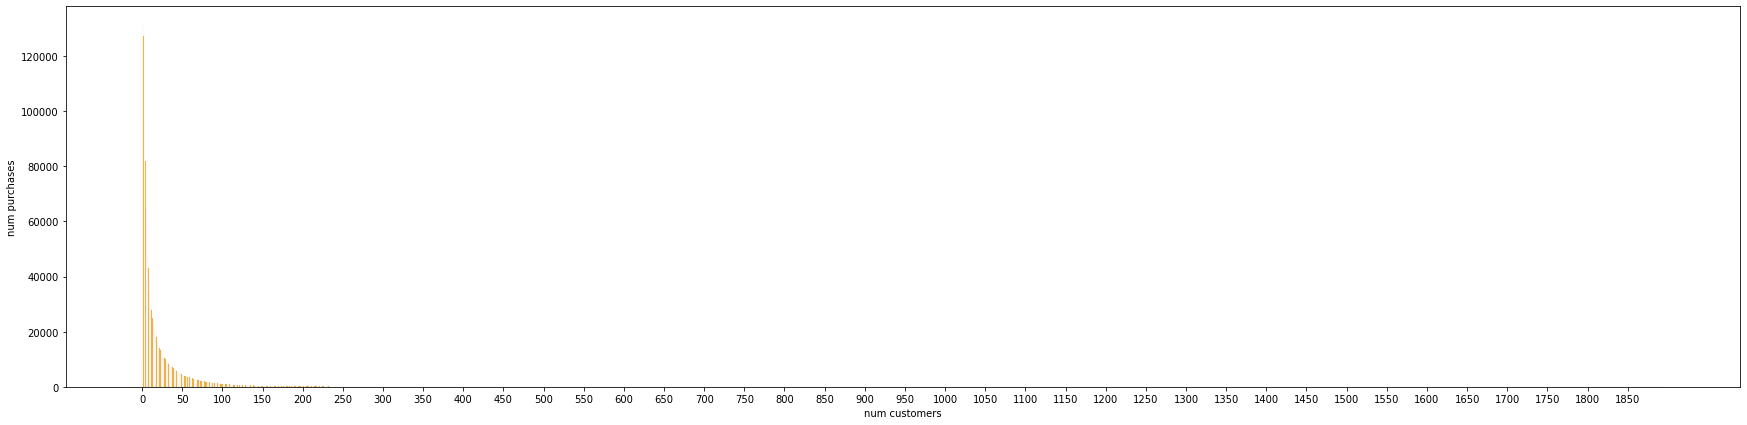

In [101]:
f, ax = plt.subplots(figsize=(30, 7))
ax = sns.histplot(data=customers, x='num_purchases', color='orange')
ax.set_xlabel('num customers')
ax.set_ylabel('num purchases')
#plt.yscale("log",base=2)
plt.xticks(ticks=range(0,1900,50))
plt.show()

# 購入回数　

一度も買われていない商品がかなり多い。
一度も買われていない商品は除外したい。

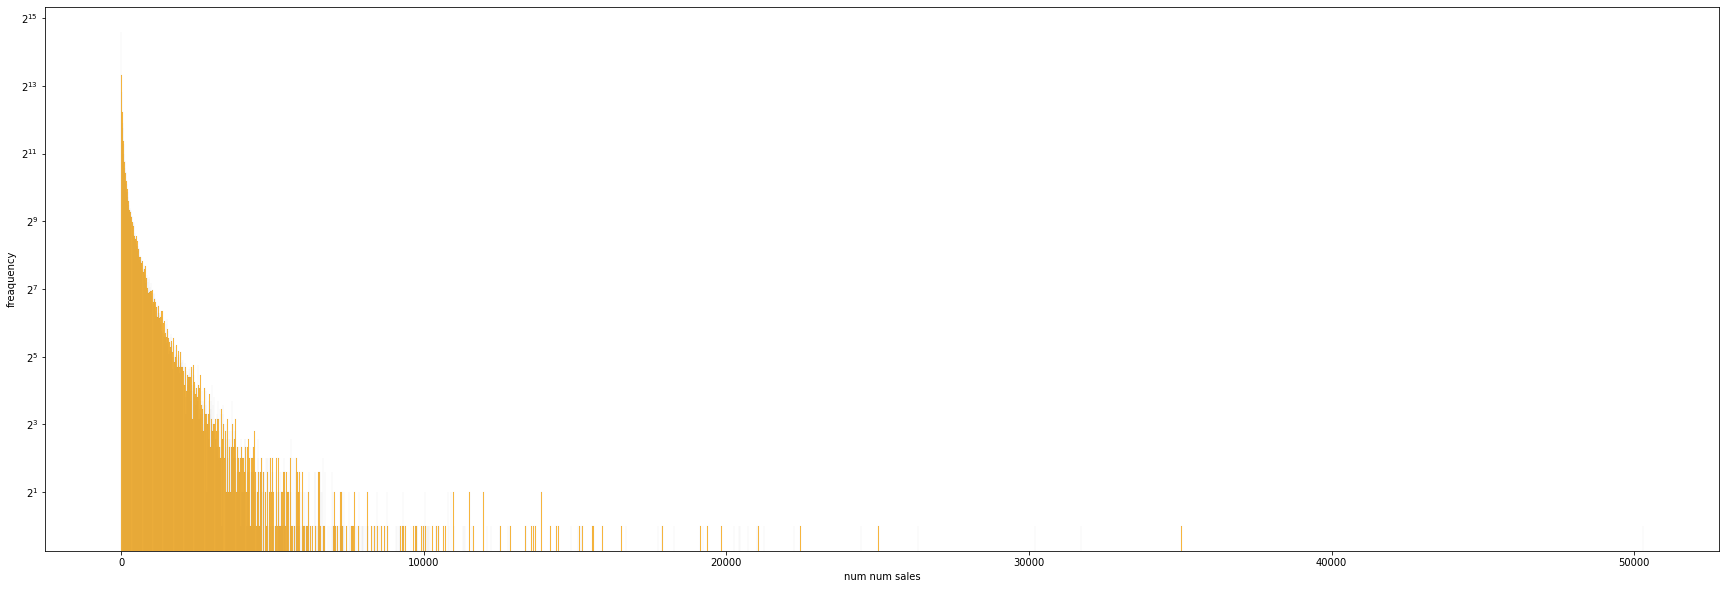

In [153]:
f, ax = plt.subplots(figsize=(30, 10))
ax = sns.histplot(data=articles, x='num_sales', color='orange')
ax.set_xlabel('num num sales')
ax.set_ylabel('freaquency')
plt.yscale("log",base=2)
plt.show()

In [116]:
labels = [ "{0} - {1}".format(i, i + 9) for i in range(0, 1890, 10) ]
c = pd.cut(customers['num_purchases'],np.arange(0, 1896, 10),labels=labels)
num_purchases = customers['num_purchases'].groupby(c).sum()
#num_purchases = pd.DataFrame(customers['num_purchases'].value_counts().sort_index())
print(num_purchases)

num_purchases
0 - 9          3023211
10 - 19        3259056
20 - 29        3035846
30 - 39        2738292
40 - 49        2403963
                ...   
1840 - 1849          0
1850 - 1859          0
1860 - 1869          0
1870 - 1879          0
1880 - 1889          0
Name: num_purchases, Length: 189, dtype: int64


In [215]:
import cv2, matplotlib.pyplot as plt

def plot_twenty_img(ids):
    plt.figure(figsize=(10,20))
    plt.subplots_adjust(wspace=0.0, hspace=0.0)
    img = [cv2.imread(f'data/images/0{i[:2]}/0{i}.jpg')[:,:,::-1] if i[0]!='0' else cv2.imread(f'data/images/{i[:3]}/{i}.jpg')[:,:,::-1] for i in ids]
    for i in range(len(img)):
        plt.subplot(4,5,i+1)
        plt.subplots_adjust(hspace=0.0)
        plt.tick_params(labelbottom="off")
        plt.tick_params(labelleft="off")
        plt.tick_params(bottom="off")
        plt.tick_params(left="off")
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['left'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)
        plt.rcParams["font.size"] = 20
        plt.title( str(i+1))
        plt.axis("off")
        plt.imshow(img[i])

In [221]:
import cv2, matplotlib.pyplot as plt

def plot_fourty_img(ids):
    plt.figure(figsize=(20,15))
    plt.subplots_adjust(wspace=0.0, hspace=0.0)
    img = [cv2.imread(f'data/images/0{i[:2]}/0{i}.jpg')[:,:,::-1] if i[0]!='0' else cv2.imread(f'data/images/{i[:3]}/{i}.jpg')[:,:,::-1] for i in ids]
    for i in range(len(img)):
        plt.subplot(4,10,i+1)
        plt.subplots_adjust(hspace=0.0)
        plt.tick_params(labelbottom="off")
        plt.tick_params(labelleft="off")
        plt.tick_params(bottom="off")
        plt.tick_params(left="off")
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['left'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)
        plt.rcParams["font.size"] = 20
        plt.title( str(i+1))
        plt.axis("off")
        plt.imshow(img[i])

In [1]:
import cv2, matplotlib.pyplot as plt
import os

def plot_hundred_img(ids):
    plt.figure(figsize=(40,20))
    plt.subplots_adjust(wspace=0.0, hspace=0.0)
    path = [f'data/images/0{i[:2]}/0{i}.jpg' if i[0]!='0' else f'data/images/{i[:3]}/{i}.jpg' for i in ids]
    img = [cv2.imread(p)[:,:,::-1] if os.path.exists(p) else 'None' for p in path]
    while 'None' in img:
        img.remove('None')
    for i in range(len(img)):
        plt.subplot(5,20,i+1)
        plt.subplots_adjust(hspace=0.0)
        plt.tick_params(labelbottom="off")
        plt.tick_params(labelleft="off")
        plt.tick_params(bottom="off")
        plt.tick_params(left="off")
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['left'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)
        plt.rcParams["font.size"] = 20
        plt.title( str(i+1))
        plt.axis("off")
        plt.imshow(img[i])

# 一度も買われたことが無い商品100

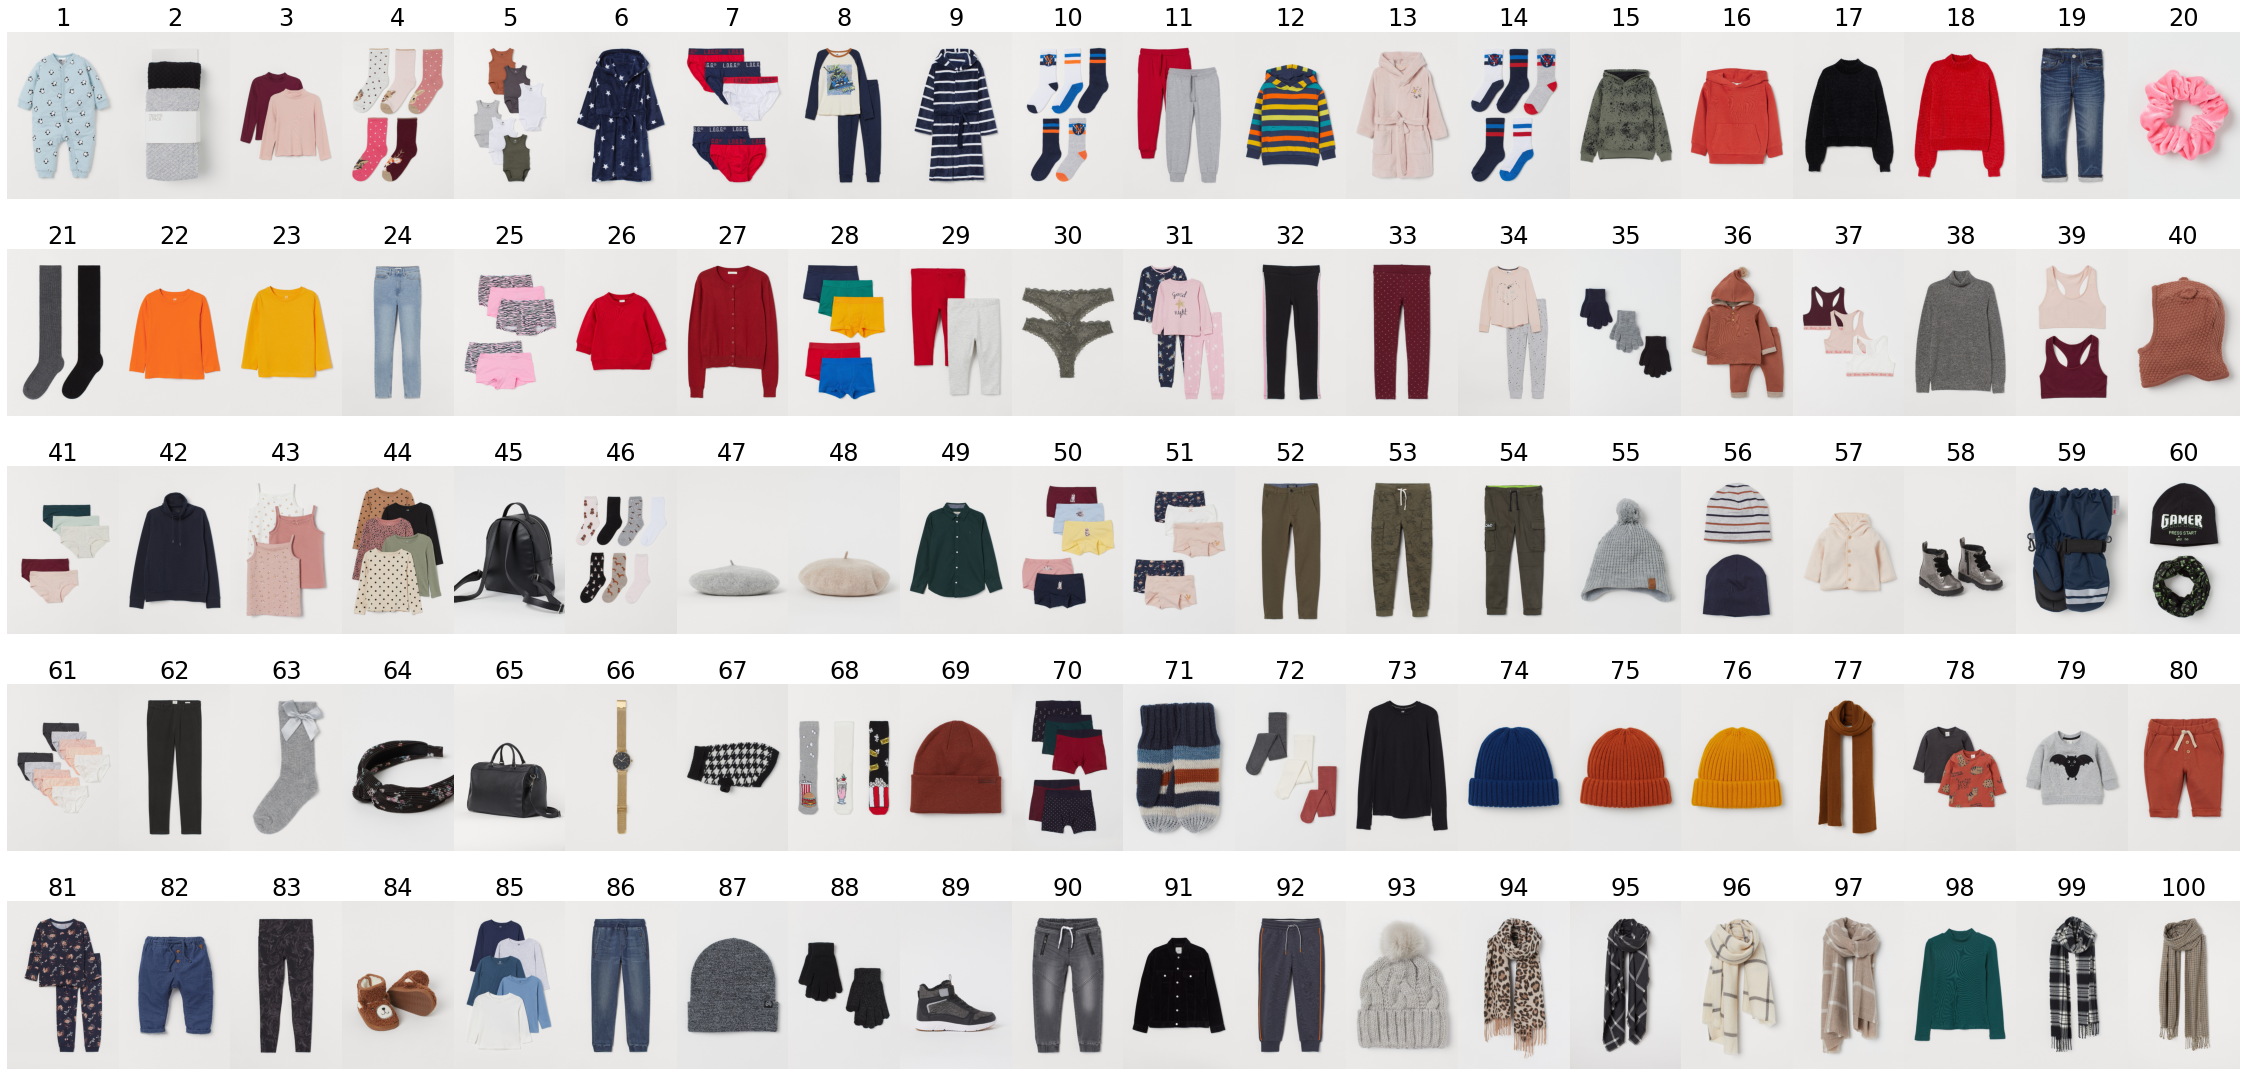

In [230]:
plot_hundred_img(articles[articles['num_sales']==0]['article_id'][:100].to_list())

# 購入商品上位100件

/tmp/ipykernel_322239/223870863.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  while 'None' in img:
/tmp/ipykernel_322239/223870863.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  img.remove('None')


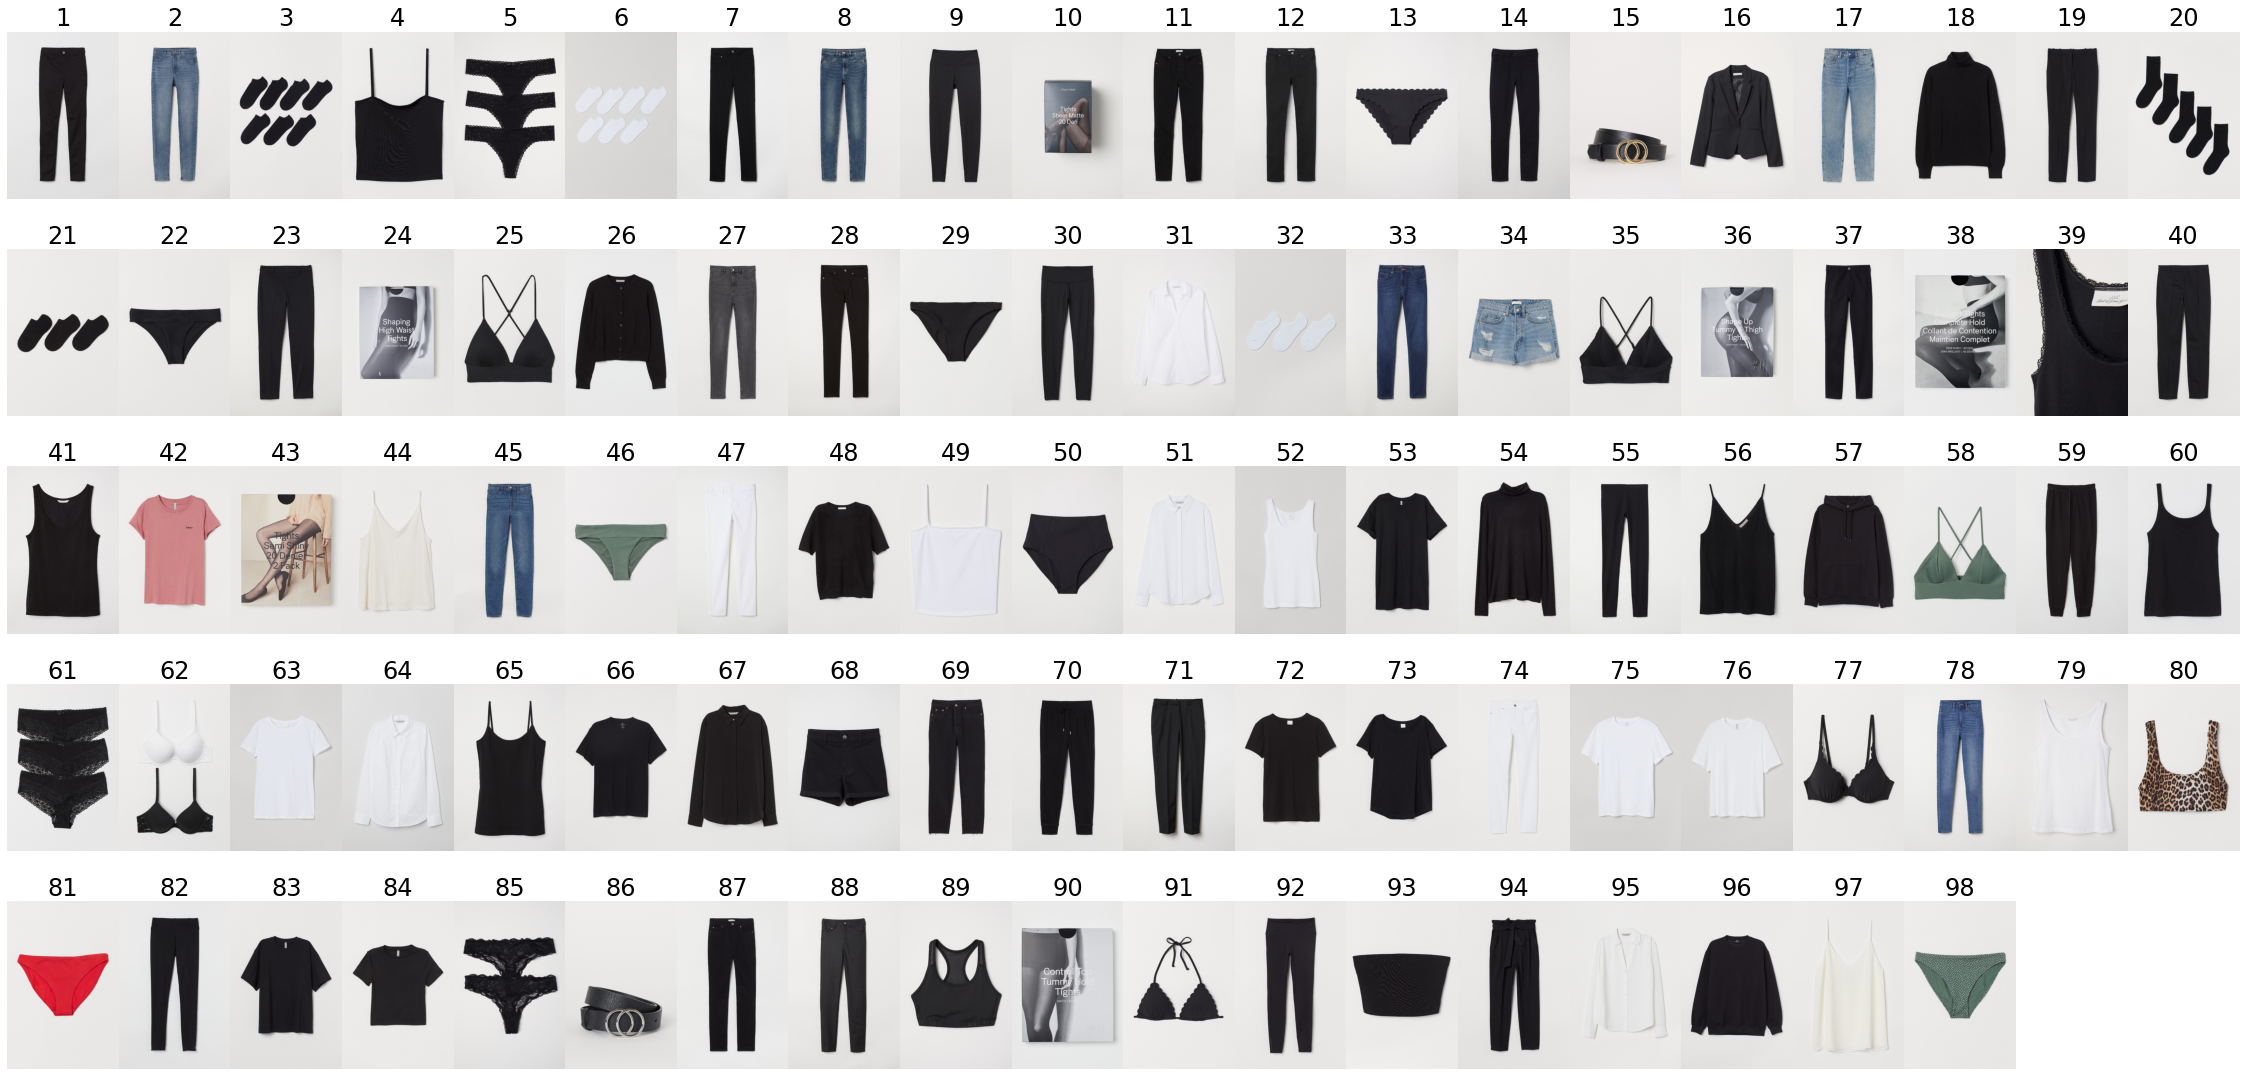

In [9]:
plot_hundred_img(articles.sort_values(by='num_sales', ascending=False)['article_id'][:100].to_list())